In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data='https://raw.githubusercontent.com/Balamurugan2007/FOML/refs/heads/main/BankNoteAuthentication.csv'
df = pd.read_csv(data)

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
train_acc_list = []
val_acc_list = []

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10),
                    activation='relu',
                    solver='adam',
                    max_iter=500,
                    early_stopping=True,
                    validation_fraction=0.1,
                    random_state=42)

In [10]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [11]:
y_pred = mlp.predict(X_test)


In [12]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:

print("\nConfusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
 [[152   1]
 [ 31  91]]
Accuracy: 0.8836
Precision: 0.9891
Recall: 0.7459
F1 Score: 0.8505


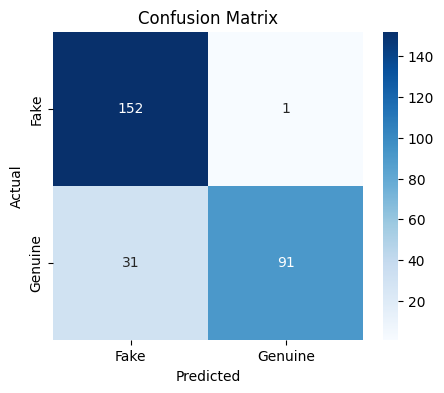

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Genuine'], yticklabels=['Fake','Genuine'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

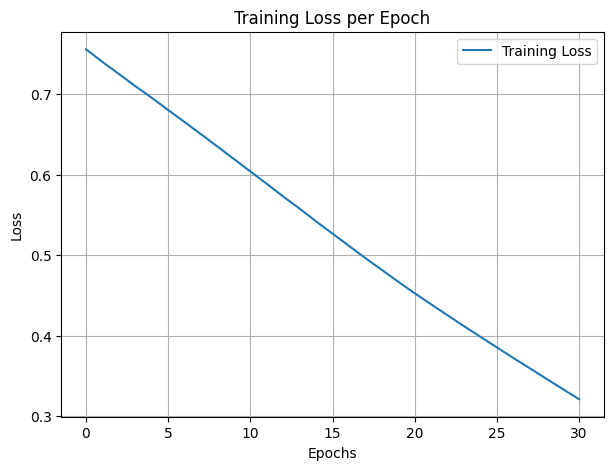


Training completed with activation: relu


In [15]:
plt.figure(figsize=(7,5))
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.grid()
plt.show()

print("\nTraining completed with activation:", mlp.activation)